In [52]:
#importing maths library 
import numpy as np
import pandas as pd

#imports from sklearn library

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets



#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style="darkgrid")

#To plot the graph embedded in the notebook
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [53]:
# Loading dataset 

df_student = pd.read_csv('student_data.csv')

In [54]:
print("Type of boston dataset: ", type(df_student))
print('\n')
print("keys of boston dataset: ", df_student.keys())

Type of boston dataset:  <class 'pandas.core.frame.DataFrame'>


keys of boston dataset:  Index(['Hours', 'Scores'], dtype='object')


In [55]:
# Getting Dataset information

df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [56]:
print("Describing the given Dataset: \n ")
df_student.describe()

Describing the given Dataset: 
 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [57]:
# analysing first 5 rows
df_student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
# Checking all columns names
df_student.columns

Index(['Hours', 'Scores'], dtype='object')

### Data Cleaning:
##### Checking is any Null values in dataset:

In [59]:
# Checking for null values

total = df_student.isnull().sum().sort_values(ascending = False)
percent_1 = df_student.isnull().sum()/df_student.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Scores,0,0.0
Hours,0,0.0


In [60]:
# Checking for na values

total = df_student.isna().sum().sort_values(ascending = False)
percent_1 = df_student.isna().sum()/df_student.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Scores,0,0.0
Hours,0,0.0


We have already checked that, there is no null or na values in these columns so we dont need to perform data cleaning.

### Exploratory Data Analysis

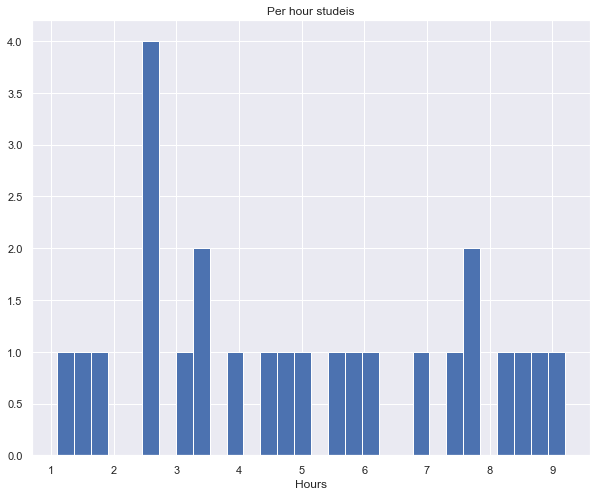

In [30]:
pyplot.figure(figsize=(10,8))
pyplot.hist(df_student['Hours'], bins=30)
pyplot.title("Per hour studeis")
pyplot.xlabel("Hours")
pyplot.show()

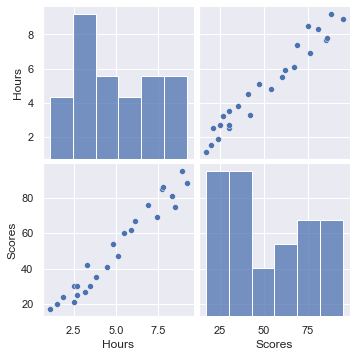

In [22]:
sns.pairplot(df_student)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

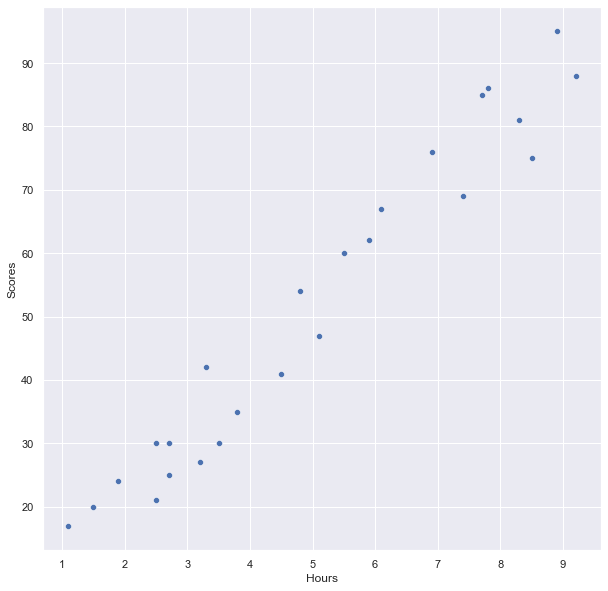

In [24]:
sns.scatterplot(x=df_student['Hours'], y=df_student['Scores'], data=df_student)

In [61]:
X = df_student['Hours']
y = df_student['Scores']

In [62]:
X = X.values.reshape(-1, 1)

In [63]:
# Sperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [65]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.9248556597026296

In [66]:
# check the coef of linear regression
model.coef_ # Get the coefficients, beta


array([9.45348802])

In [67]:
model.intercept_ # Get the intercept, b


3.515254764604933

In [69]:
# Predicting results for the test dataset
y_linear_prediction = model.predict(X_test)

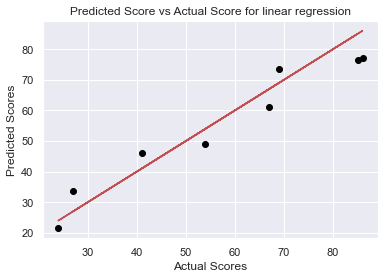

In [71]:
pyplot.scatter(y_test,y_linear_prediction,color = 'black')
pyplot.plot(y_test.values,y_test.values,'r') # best fit line that could be possible
pyplot.xlabel("Actual Scores")
pyplot.ylabel("Predicted Scores")
pyplot.title("Predicted Score vs Actual Score for linear regression")
pyplot.show()

In [72]:
#Get mean squared error and R-square for testing data
from sklearn.metrics import mean_squared_error, r2_score
print("MAE:",metrics.mean_absolute_error(y_test,y_linear_prediction))
print("MSE:",metrics.mean_squared_error(y_test,y_linear_prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_linear_prediction)))
print('R-Squared Error: ', r2_score(y_test,y_linear_prediction))

MAE: 5.897931072550458
MSE: 38.71694720790297
RMSE: 6.222294368470763
R-Squared Error:  0.9248556597026296


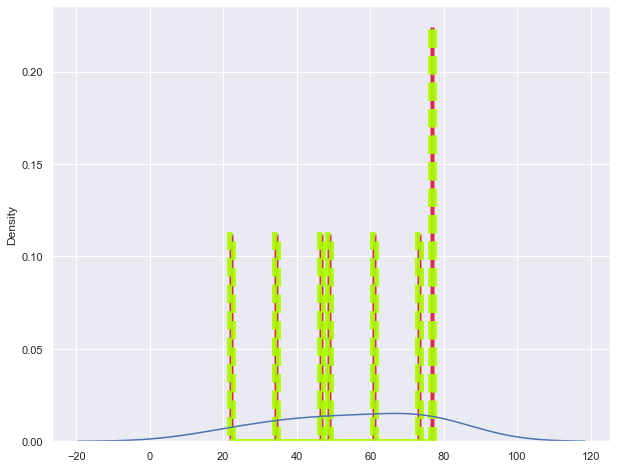

In [73]:
# plotting dist plot for prediction data
pyplot.figure(figsize=(10,8))
sns.distplot((y_linear_prediction),bins=50, hist_kws = {'color':'#DC143C', 'edgecolor':'#aaff00',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.9});


<AxesSubplot:ylabel='Density'>

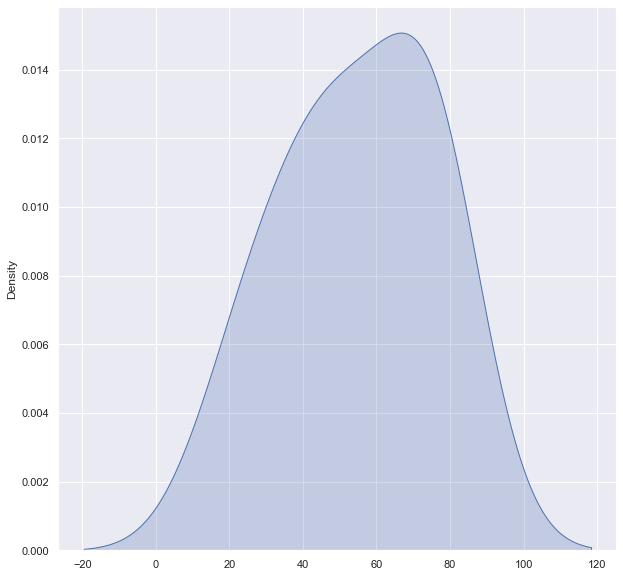

In [74]:
# distribution of pridicted values
pyplot.figure(figsize=(10,10))
sns.kdeplot(y_linear_prediction, shade=True)

### Lasso Regression:

In [75]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,y_train)
y_pred_train = ls.predict(X_train) #predictions on training data
y_pred = ls.predict(X_test) #predictions on testing data

In [78]:
#Let's get the coefficients
print('Intercept: ',ls.intercept_) # This gives us the intercept term
print('Coefficients: \n',ls.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  3.5851205828925785
Coefficients: 
 [9.43898596]


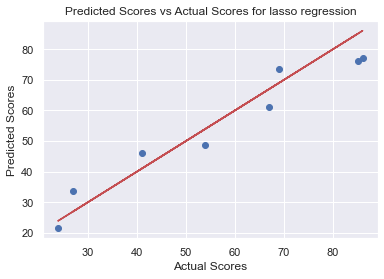

In [80]:
pyplot.scatter(y_test,y_pred)
pyplot.plot(y_test.values,y_test.values,'r') # best fit line that could be possible
pyplot.xlabel("Actual Scores")
pyplot.ylabel("Predicted Scores")
pyplot.title("Predicted Scores vs Actual Scores for lasso regression")
pyplot.show()

In [81]:
#Get mean squared error and R-square for both training & testing data
from sklearn.metrics import mean_squared_error, r2_score
print('Mean absolute Error on training data:',metrics.mean_absolute_error(y_train,y_pred_train), '| And on Testing data', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: on training data: ',mean_squared_error(y_train,y_pred_train), '| And on Testing data',mean_squared_error(y_test,y_pred))
print('R-Squared Error: on training data: ',r2_score(y_train,y_pred_train), '| And on Testing data',r2_score(y_test,y_pred))
print('Root Mean Square Error: on training data: ',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)), '| And on Testing data' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute Error on training data: 4.496559117821212 | And on Testing data 5.9043930209452
Mean Squared Error: on training data:  25.69277825038947 | And on Testing data 38.907018835703475
R-Squared Error: on training data:  0.9599762132688521 | And on Testing data 0.9244867564674747
Root Mean Square Error: on training data:  5.068804420214837 | And on Testing data 6.237549104873121


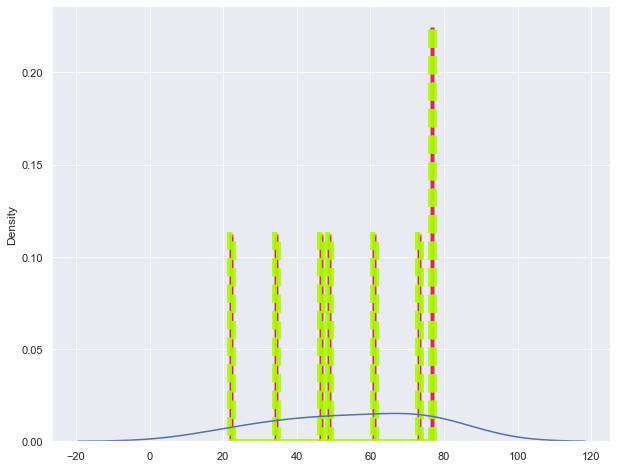

In [82]:
# plotting dist plot for prediction data
pyplot.figure(figsize=(10,8))
sns.distplot((y_pred),bins=50, hist_kws = {'color':'#DC143C', 'edgecolor':'#aaff00',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.9});


### Ridge Regression

In [84]:
from sklearn import linear_model

from sklearn.linear_model import ridge
ridge = linear_model.Ridge()
ridge.fit(X_train,y_train)

y_pred_ridge = ridge.predict(X_test)
print(mean_squared_error(y_pred_ridge, y_test))

print(ridge.coef_)


print(ridge.intercept_)

39.78901404686771
[9.37352599]
3.900483625399289


In [86]:
#Get mean squared error and R-square for both training & testing data
from sklearn.metrics import mean_squared_error, r2_score
print('Mean absolute Error on training data:',metrics.mean_absolute_error(y_train,y_pred_train), '| And on Testing data', metrics.mean_absolute_error(y_test,y_pred_ridge))
print('Mean Squared Error: on training data: ',mean_squared_error(y_train,y_pred_train), '| And on Testing data',mean_squared_error(y_test,y_pred_ridge))
print('R-Squared Error: on training data: ',r2_score(y_train,y_pred_train), '| And on Testing data',r2_score(y_test,y_pred_ridge))
print('Root Mean Square Error: on training data: ',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)), '| And on Testing data' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)))

Mean absolute Error on training data: 4.496559117821212 | And on Testing data 5.933561214437114
Mean Squared Error: on training data:  25.69277825038947 | And on Testing data 39.78901404686771
R-Squared Error: on training data:  0.9599762132688521 | And on Testing data 0.9227749234571787
Root Mean Square Error: on training data:  5.068804420214837 | And on Testing data 6.30785336282223


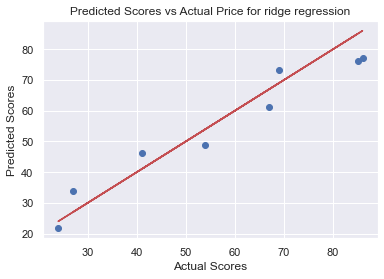

In [87]:
pyplot.scatter(y_test,y_pred_ridge)
pyplot.plot(y_test.values,y_test.values,'r') # best fit line that could be possible
pyplot.xlabel("Actual Scores")
pyplot.ylabel("Predicted Scores")
pyplot.title("Predicted Scores vs Actual Price for ridge regression")
pyplot.show()

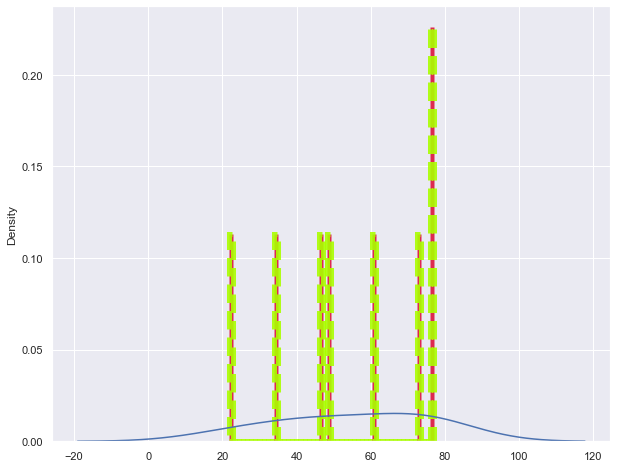

In [88]:
# plotting dist plot for prediction data
pyplot.figure(figsize=(10,8))
sns.distplot((y_pred_ridge),bins=50, hist_kws = {'color':'#DC143C', 'edgecolor':'#aaff00',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.9});


In [89]:
# getting all erros in one.
error_dict = {'Type Of Algorithm' :['Simple Linear Regression','Ridge Regression','Lasso Regression'],
      'MAE': [metrics.mean_absolute_error(y_test,y_linear_prediction),
              metrics.mean_absolute_error(y_test,y_pred_ridge),
              metrics.mean_absolute_error(y_test,y_pred)], 
      'MSE':[metrics.mean_squared_error(y_test,y_linear_prediction),
            mean_squared_error(y_test,y_pred_ridge),
            mean_squared_error(y_test,y_pred)],
    'R-Squared Error': [r2_score(y_test,y_linear_prediction),
                       r2_score(y_test,y_pred_ridge),                   
                        r2_score(y_test,y_pred)],
    'RMSE': [np.sqrt(metrics.mean_squared_error(y_test,y_linear_prediction)),
             np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge)),
             np.sqrt(metrics.mean_squared_error(y_test,y_pred))]}

In [90]:
# creating dataframe for all errors
df_erros = pd.DataFrame(error_dict)
df_erros

,Type Of Algorithm,MAE,MSE,R-Squared Error,RMSE
0,Simple Linear Regression,5.897931,38.716947,0.924856,6.222294
1,Ridge Regression,5.933561,39.789014,0.922775,6.307853
2,Lasso Regression,5.904393,38.907019,0.924487,6.237549


#### We have applied Linear, Ridge, Lasso regression to calculated best fit and identify all metrics. We can see in above dataframe that root mean sequared error (RMSE) is less for the lasso regression in given scenarios. 

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [101]:
 X_new = [[9.25]]

In [102]:
scores_new = model.predict(X_new)

In [103]:
print ("Scores for student stuying 9.25 hours a day is :", scores_new)

Scores for student stuying 9.25 hours a day is : [90.96001897]
